#### **Task 6**: How many states cover 50% of US air traffic? 

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df_flights = pd.read_csv(r'..\..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
filter = df_flights[['origin_city_name','dest_city_name','flights']]
filter.head()

,origin_city_name,dest_city_name,flights
0,"Las Vegas, NV","Oklahoma City, OK",1
1,"Las Vegas, NV","Omaha, NE",1
2,"Las Vegas, NV","Omaha, NE",1
3,"Las Vegas, NV","Ontario, CA",1
4,"Las Vegas, NV","Ontario, CA",1


In [ ]:
new_origin = filter['origin_city_name'].str.split(",", n = 1, expand = True)
new_origin.head()

,0,1
0,Las Vegas,NV
1,Las Vegas,NV
2,Las Vegas,NV
3,Las Vegas,NV
4,Las Vegas,NV


In [ ]:
new_dest = filter['dest_city_name'].str.split(",", n = 1, expand = True)
new_dest.head()

,0,1
0,Oklahoma City,OK
1,Omaha,NE
2,Omaha,NE
3,Ontario,CA
4,Ontario,CA


In [ ]:
filter['origin_state'] = new_origin[1]
filter['dest_state'] = new_dest[1]
filter.head()

C:\Users\User\AppData\Local\Temp\ipykernel_25028\4092038663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['origin_state'] = new_origin[1]
C:\Users\User\AppData\Local\Temp\ipykernel_25028\4092038663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['dest_state'] = new_dest[1]


,origin_city_name,dest_city_name,flights,origin_state,dest_state
0,"Las Vegas, NV","Oklahoma City, OK",1,NV,OK
1,"Las Vegas, NV","Omaha, NE",1,NV,NE
2,"Las Vegas, NV","Omaha, NE",1,NV,NE
3,"Las Vegas, NV","Ontario, CA",1,NV,CA
4,"Las Vegas, NV","Ontario, CA",1,NV,CA


In [ ]:
flights_by_state = filter.groupby(['origin_state','dest_state'], as_index=False).sum('flights').sort_values(by='flights',ascending=False)
flights_by_state.head()

,origin_state,dest_state,flights
81,CA,CA,3325
1150,TX,TX,2525
113,CA,TX,997
1114,TX,CA,901
250,FL,NY,895


In [ ]:
flights_by_state['percent_total_flights'] = 100*(flights_by_state['flights']/flights_by_state['flights'].sum())
flights_by_state.head()

,origin_state,dest_state,flights,percent_total_flights
81,CA,CA,3325,3.292144
1150,TX,TX,2525,2.500050
113,CA,TX,997,0.987148
1114,TX,CA,901,0.892097
250,FL,NY,895,0.886156


In [ ]:
flights_by_state['cum_percent'] = 100*(flights_by_state.flights.cumsum() / flights_by_state.flights.sum())
flights_by_state.head()

,origin_state,dest_state,flights,percent_total_flights,cum_percent
81,CA,CA,3325,3.292144,3.292144
1150,TX,TX,2525,2.500050,5.792194
113,CA,TX,997,0.987148,6.779342
1114,TX,CA,901,0.892097,7.671439
250,FL,NY,895,0.886156,8.557595


In [ ]:
highest_traffic = flights_by_state.loc[flights_by_state['cum_percent'] <= 50,:]
highest_traffic.head()

,origin_state,dest_state,flights,percent_total_flights,cum_percent
81,CA,CA,3325,3.292144,3.292144
1150,TX,TX,2525,2.500050,5.792194
113,CA,TX,997,0.987148,6.779342
1114,TX,CA,901,0.892097,7.671439
250,FL,NY,895,0.886156,8.557595


In [ ]:
states = set(highest_traffic['origin_state']) | set(highest_traffic['dest_state'])
len(states)

29

In [ ]:
highest_traffic_plot = highest_traffic[['origin_state','flights']]
highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())
highest_traffic_plot = highest_traffic_plot.groupby('origin_state',as_index=False).sum('flights').sort_values(by='flights', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_25028\3693035196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())


Text(0.5, 1.0, 'States Accounting for 50% of Air Travel')

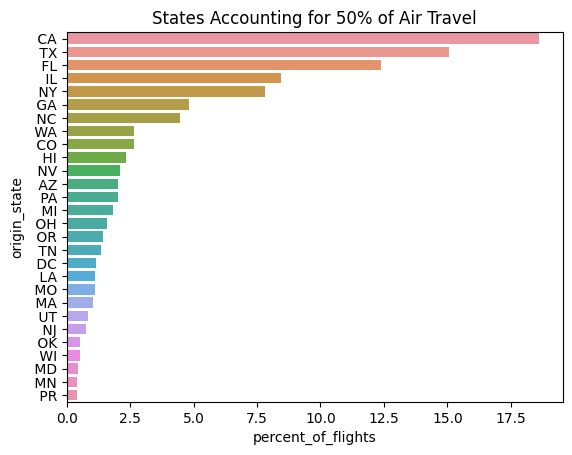

In [ ]:
g = sns.barplot(data=highest_traffic_plot, x='percent_of_flights',  y='origin_state')
g.set_title('States Accounting for 50% of Air Travel')

50% of air traffic occurs across 29 states